In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data_apoyo/qog_std_cs_jan18.csv')

In [4]:
# seleccion 50% de los casos
# random_state=1234 semilla aleatoria (ultimos digitos rut, supuesto)
df_frac = df.sample(frac=.5, random_state=1234)

In [5]:
cods = [1,2,3,4,5,6,7,8,9,10]
nombres = ['EastEurope', 'LatAm', 'NorthAfrica','SubSaharian', 'WesternDem',
            'EastAsia','SouthEastAsia','SouthAsia', 'Pacific', 'Caribbean' ]

# apellido terrazas
columnas_nz = ['cname', 'ccodealp','ht_region', 'gle_cgdpc', 'undp_hdi','imf_pop',
               'wef_imort', 'who_alc2000', 'who_tobt','wdi_exph']


In [6]:
# ocupamos columnas nz por apellido del profe terrazas
df_frac = df_frac.loc[:, columnas_nz]

In [7]:
# renombres regiones
df_frac['ht_region'] = df_frac['ht_region'].replace(cods, nombres)

## 2

Reportar estadisticas para: gle_cgdpc, undp_hdi, imf_pop

In [8]:
# python por defecto con el describe() devuelve medidas descriptivas para variables continuas
# y frecuencia para variables discretas

def get_descriptive(df, columnas):
    for k, v in df.iteritems():
        if k in columnas:
            print(f'{k}:')
            print(v.describe())
            print('-'*90)

In [9]:
columnas = ['gle_cgdpc', 'undp_hdi', 'imf_pop']
get_descriptive(df_frac, columnas)

gle_cgdpc:
count        96.000000
mean      15676.866471
std       21061.300373
min         488.269990
25%        2850.155000
50%        9337.989750
75%       18093.010250
max      108481.130000
Name: gle_cgdpc, dtype: float64
------------------------------------------------------------------------------------------
undp_hdi:
count    94.000000
mean      0.700628
std       0.156066
min       0.347000
25%       0.567500
50%       0.734500
75%       0.818250
max       0.938000
Name: undp_hdi, dtype: float64
------------------------------------------------------------------------------------------
imf_pop:
count     73.000000
mean      26.257151
std       46.742281
min        0.012000
25%        2.045000
50%        8.544000
75%       30.709000
max      252.164993
Name: imf_pop, dtype: float64
------------------------------------------------------------------------------------------


## 3

In [10]:
def missing_cases(df, var, print_list=False):
    tmp = df.copy()
    tmp['flagnull'] = tmp[var].isnull()
    count_na = 0
    for i, r in tmp.iterrows():
        if r['flagnull'] is True:
            count_na += 1
            if print_list == True:
                print(r['cname'])
    
    print('Casos nulos para {}: {}'.format(var, count_na))
    print('Porcentaje nulos para {}: {}'.format(var, count_na/df.shape[0]))

In [11]:
for col in df_frac.columns:
    missing_cases(df, var=col, print_list=False)
    print('-'*100)

Casos nulos para cname: 0
Porcentaje nulos para cname: 0.0
----------------------------------------------------------------------------------------------------
Casos nulos para ccodealp: 0
Porcentaje nulos para ccodealp: 0.0
----------------------------------------------------------------------------------------------------
Casos nulos para ht_region: 0
Porcentaje nulos para ht_region: 0.0
----------------------------------------------------------------------------------------------------
Casos nulos para gle_cgdpc: 2
Porcentaje nulos para gle_cgdpc: 0.010309278350515464
----------------------------------------------------------------------------------------------------
Casos nulos para undp_hdi: 8
Porcentaje nulos para undp_hdi: 0.041237113402061855
----------------------------------------------------------------------------------------------------
Casos nulos para imf_pop: 49
Porcentaje nulos para imf_pop: 0.25257731958762886
----------------------------------------------------------

In [12]:
for col in ['imf_pop', 'wef_imort', 'who_tobt']:
    missing_cases(df, var=col, print_list=True)
    print('-'*90)

Albania
Andorra
Antigua and Barbuda
Botswana
Burundi
Cameroon
Central African Republic
Chad
China
Congo
Congo, Democratic Republic
Costa Rica
Cuba
Dominica
Dominican Republic
El Salvador
Equatorial Guinea
Eritrea
Djibouti
Gabon
Gambia
Ghana
Grenada
Guatemala
Haiti
Honduras
India
Korea, North
Lesotho
Liberia
Liechtenstein
Madagascar
Monaco
Namibia
Niger
Guinea-Bissau
St Kitts and Nevis
Sao Tome and Principe
Senegal
Somalia
South Sudan
Sudan (2012-)
Syria
United Arab Emirates
Tunisia
Turkmenistan
Venezuela
Yemen
Zambia
Casos nulos para imf_pop: 49
Porcentaje nulos para imf_pop: 0.25257731958762886
------------------------------------------------------------------------------------------
Afghanistan
Andorra
Antigua and Barbuda
Bahamas
Solomon Islands
Belarus
Central African Republic
Comoros
Congo
Cuba
Dominica
Equatorial Guinea
Eritrea
Fiji
Djibouti
Kiribati
Grenada
Iraq
Korea, North
Liechtenstein
Maldives
Monaco
Nauru
Vanuatu
Niger
Micronesia
Marshall Islands
Palau
Papua New Guinea
Guine

## 4

In [13]:
'''Funcion que plotea un histograma de una variable. Ademas agrega lineas verticales
con la media del sample_df o el dataframe global en caso de ser solicitado.'''

'Funcion que plotea un histograma de una variable. Ademas agrega lineas verticales\ncon la media del sample_df o el dataframe global en caso de ser solicitado.'

In [14]:
def hist_plot(sample_df, full_df, var, sample_mean=False, true_mean=False):
    plt.hist(sample_df[var].dropna(), color='grey', alpha=.5)
    plt.title('Histograma: {}'.format(var))
    if sample_mean is True:
        plt.axvline(sample_df[var].mean(), color='blue', lw=3)
    if true_mean is True:
        plt.axvline(full_df[var].mean(), color='red', lw=3)
    plt.show()

#### recordamos que df_frac posee un 50% de los datos

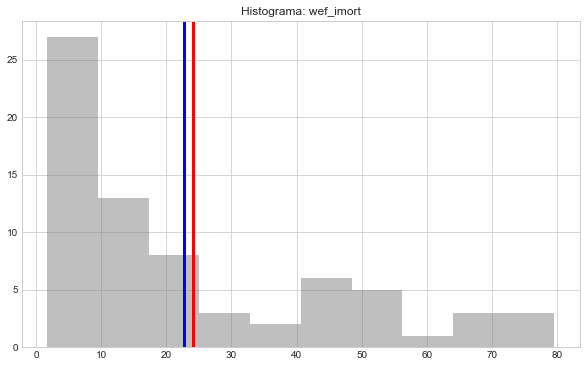

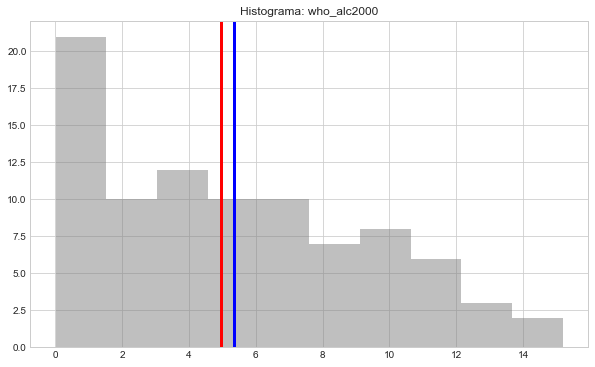

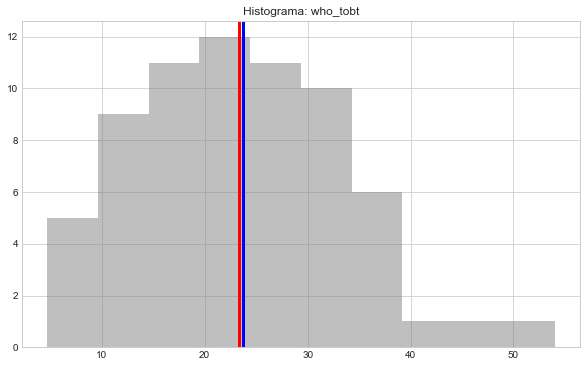

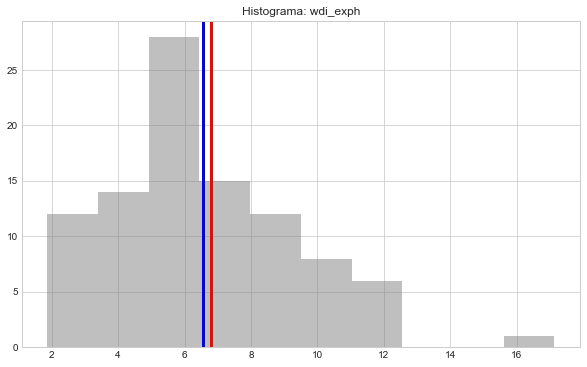

In [15]:
# ocupamos columnas que fueron agregadas de acuerdo al apellido
for col in ['wef_imort', 'who_alc2000', 'who_tobt','wdi_exph']:
    hist_plot(df_frac, df, col, sample_mean=True, true_mean=True)

## 5

In [16]:
# dotplot por region geografica (agrupando por la media)

In [17]:
def dot_plot(df, plot_var, plot_by='ht_region', statistic='mean', global_stat=False):
    tmp = df.loc[:, [plot_var, plot_by]]
    tmp = df.groupby(plot_by).agg({plot_var: statistic})
    plt.plot(tmp.values, tmp.index, 'o', color='grey')
    plt.title('Dotplot {} by {}'.format(plot_by, plot_var))
    if statistic == 'mean':
        plt.axvline(tmp[plot_var].mean(), color='red', linestyle='--')
    if statistic == 'median':
        plt.axvline(tmp[plot_var].median(), color='blue', linestyle='--')
    plt.show()

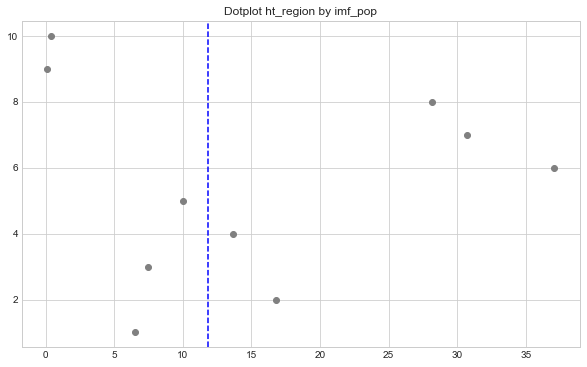

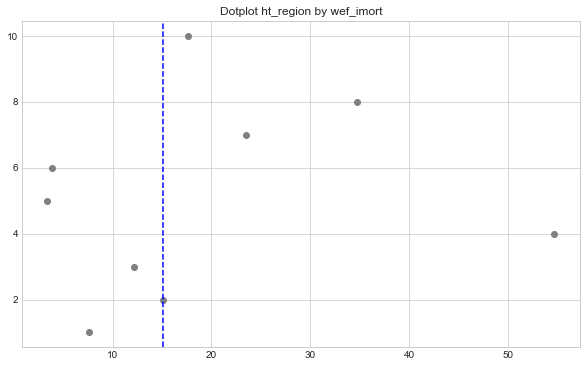

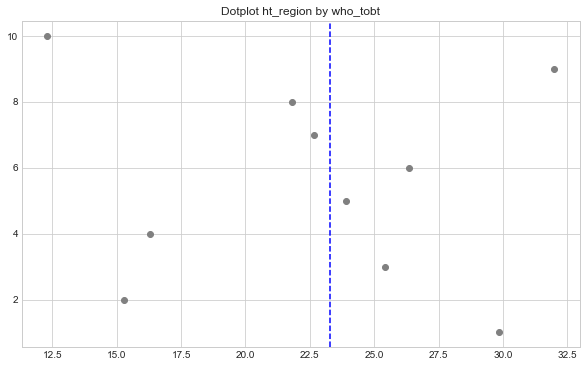

In [18]:
for col in ['imf_pop', 'wef_imort', 'who_tobt']:
    dot_plot(df, col, plot_by='ht_region', statistic='median', global_stat=False)